## Section 1 Introduction

### World Happiness Data 

This is a project to train a machine learning model to predict healthy life expectancy based on data from the World Happiness Data Csv in this folder.

The Features are GDP per capita, Generosity score, Social support score, Perceptions of corruption score, and Freedom to make life choices score. 


# Section 2 Imports


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Section 3 Description

In [ ]:
data_frame = pd.read_csv("world_happiness_2024.csv", sep=';')
print(data_frame.keys())

data_frame.replace(',','.',regex=True, inplace=True)

data_frame.head(n=10)
data_frame.tail(n=15)
# remove commas from dataframe

data_frame['Ladder score'] =data_frame['Ladder score'].astype(float)
data_frame['GDP per capita'] =data_frame['GDP per capita'].astype(float)
data_frame['Generosity'] =data_frame['Generosity'].astype(float)
data_frame['Social support'] =data_frame['Social support'].astype(float)
data_frame['Healthy life expectancy'] =data_frame['Healthy life expectancy'].astype(float)
data_frame['Freedom to make life choices'] =data_frame['Freedom to make life choices'].astype(float)
data_frame['Perceptions of corruption'] =data_frame['Perceptions of corruption'].astype(float)
data_frame.info()

Index(['Ranking', 'Country', 'Regional indicator', 'Ladder score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ranking                       140 non-null    int64  
 1   Country                       140 non-null    object 
 2   Regional indicator            140 non-null    object 
 3   Ladder score                  140 non-null    float64
 4   GDP per capita                140 non-null    float64
 5   Social support                140 non-null    float64
 6   Healthy life expectancy       140 non-null    float64
 7   Freedom to make life choices  140 non-null    float64
 8   Generosity                    140 non-null    float

In [ ]:
data_frame.tail(n=15)

,Ranking,Country,Regional indicator,Ladder score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
125,121,Togo,Sub-Saharan Africa,4.2141,3.54351,0.36257,65.0,0.52429,0.31606,0.27127
126,112,Tunisia,Middle East and North Africa,4.4218,6.10340,0.59058,73.0,0.29414,0.05960,0.03191
127,96,Turkiye,Middle East and North Africa,4.9753,7.94937,0.72687,74.0,0.23407,0.16981,0.19955
128,114,Uganda,Sub-Saharan Africa,4.3717,3.60638,0.71189,66.0,0.68044,0.44368,0.09423
129,102,Ukraine,Commonwealth of Independent States,4.8730,6.30641,0.81364,71.0,0.73048,0.71213,0.04414
130,22,United Arab Emirates,Middle East and North Africa,6.7331,9.26467,0.72003,72.0,0.94401,0.52127,0.44914
131,20,United Kingdom,Western Europe,6.7490,8.51296,0.82035,75.0,0.82599,0.66512,0.61091
132,23,United States,North America and ANZ,6.7248,9.05791,0.86094,72.0,0.67918,0.55708,0.29412
133,26,Uruguay,Latin America and Caribbean,6.6115,7.45412,0.88550,73.0,0.89791,0.26459,0.38336
134,47,Uzbekistan,Commonwealth of Independent States,6.1950,5.66075,0.86264,71.0,0.96713,0.62743,0.37326


# Section 4 Analysis and Visualization

array([[<Axes: title={'center': 'Ranking'}>,
        <Axes: title={'center': 'Ladder score'}>,
        <Axes: title={'center': 'GDP per capita'}>],
       [<Axes: title={'center': 'Social support'}>,
        <Axes: title={'center': 'Healthy life expectancy'}>,
        <Axes: title={'center': 'Freedom to make life choices'}>],
       [<Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions of corruption'}>, <Axes: >]],
      dtype=object)

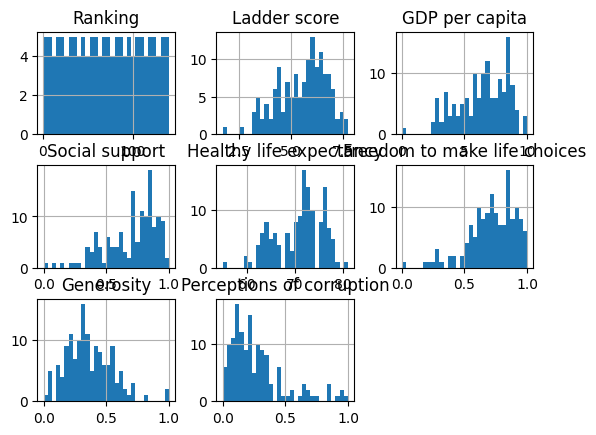

In [ ]:
data_frame.hist(bins=30)

In [ ]:
train_set, test_set = train_test_split(data_frame, test_size=0.2, random_state=123)
print(len(train_set), len(test_set))

112 28


In [ ]:
reg = LinearRegression()

X = train_set[['GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity']]
y = train_set["Healthy life expectancy"]

In [ ]:
reg.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
print("The bias is " , reg.intercept_)
print("The feature coefficients are ", reg.coef_)
print("The score for the training set is", reg.score(X,y))

# Check the performance on the test set
X_test = test_set[['GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity']]
y_test = test_set["Healthy life expectancy"]
print("The score for the test set is", reg.score(X_test,y_test))

The bias is  55.428720075820884
The feature coefficients are  [1.66189519 5.95759922 0.27735194 0.50129446]
The score for the training set is 0.7107562749324439
The score for the test set is 0.6793179800714206
